# Assignment 5

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, auc, roc_curve)
from sklearn.model_selection import train_test_split

# 1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the Training Error (MSE, MAE) and Testing Error (MSE, MAE)

## Is there a correlation between mpg and weight?

In [149]:
auto = pd.read_csv('Auto.data.csv')
auto_test = pd.read_csv('Auto.data.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [150]:
x = auto['mpg'].values.reshape(-1, 1)
y = auto['weight']

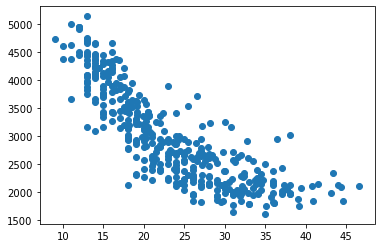

In [151]:
plt.scatter(x, y) # plot variables

In [152]:
model = LinearRegression() # create a linear regression model and evaluate the coefficients
model.fit(x, y)
model.coef_, model.intercept_

(array([-90.11660119]), 5089.432154538391)

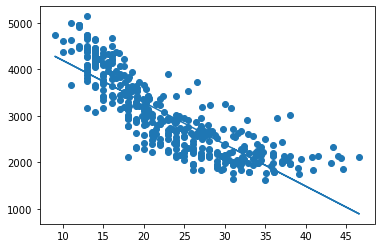

In [153]:
plt.scatter(x, y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_) # add the regression line to the scatter plot

In [154]:
# split data into testing/training 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [155]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([-90.20087219]), 5108.344887083014)

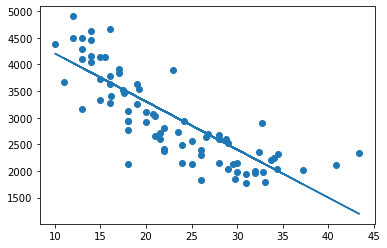

In [156]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

In [157]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_) # testing error

232689.5723862828

In [158]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_) # training error

218443.37377366982

# 2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate Accuracy, Confusion Matrix, and Classifcation Report

## Predict whether a bike user is a casual or registered member

In [159]:
bikes = pd.read_csv('bikeshare.csv.gz')
bikes_test = pd.read_csv('bikeshare.csv.gz')
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [160]:
bikes['Member Type'].unique() 

array(['Registered', 'Casual'], dtype=object)

In [161]:
# replace member type columns with numeric values
bikes['Member Type'].replace({"Registered": 1, "Casual": 0}, inplace = True)
bikes_test['Member Type'].replace({"Registered": 1, "Casual": 0}, inplace = True)

In [162]:
bikes['Member Type'].unique(), bikes_test['Member Type'].unique() # look at the unique values of column

(array([1, 0], dtype=int64), array([1, 0], dtype=int64))

In [163]:
bikes.columns # look at column names of df

Index(['Duration (ms)', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member Type'],
      dtype='object')

In [164]:
non_numeric_columns = ['Start date', 'End date', 'Start station', 'End station', 'Bike number'] # define non numeric columns

In [165]:
x = bikes.copy().drop(non_numeric_columns, axis = 1) # remove non numeric columns
x.head()

,Duration (ms),Start station number,End station number,Member Type
0,301295,31280,31506,1
1,557887,31275,31114,1
2,555944,31101,31221,1
3,766916,31226,31214,1
4,139656,31011,31009,1


In [166]:
xt = bikes.copy().drop(non_numeric_columns, axis = 1) # remove non numeric columns
xt.head()

,Duration (ms),Start station number,End station number,Member Type
0,301295,31280,31506,1
1,557887,31275,31114,1
2,555944,31101,31221,1
3,766916,31226,31214,1
4,139656,31011,31009,1


In [167]:
x['Member Type'].value_counts() # check how many of each type are in column

1    467432
0     84967
Name: Member Type, dtype: int64

In [168]:
model = DecisionTreeClassifier(criterion = 'entropy') # select "Decision Tree" as classifier model

In [169]:
model.fit(x.drop(['Member Type'], axis = 1), x['Member Type']) # fit the data using the classifier excluding member type

DecisionTreeClassifier(criterion='entropy')

In [170]:
list(zip(x.drop(['Member Type'], axis = 1).columns, model.feature_importances_)) # guage variable importance exlcusing member type column

[('Duration (ms)', 0.61187703879973),
 ('Start station number', 0.1914375418681202),
 ('End station number', 0.19668541933214975)]

In [171]:
set(x.columns) - set(xt.columns) # convert any of the iterable to sequence of iterable elements with distinct elements

set()

In [172]:
predictions = model.predict(xt.drop(['Member Type'], axis = 1)) # set predictions

In [173]:
predictions_train = model.predict(x.drop(['Member Type'], axis = 1)) # set training predictions

In [174]:
# split data into training and testing set 80/20
x_train, x_test, y_train, y_test = train_test_split(x.drop(['Member Type'], axis = 1), x['Member Type'], test_size = 0.20)

In [175]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [176]:
test_predictions = model.predict(x_test)

In [177]:
accuracy_score(y_test, test_predictions)

0.8890839971035481

In [178]:
confusion_matrix(y_test, test_predictions)

array([[11071,  5931],
       [ 6323, 87155]], dtype=int64)

In [179]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64     17002
           1       0.94      0.93      0.93     93478

    accuracy                           0.89    110480
   macro avg       0.79      0.79      0.79    110480
weighted avg       0.89      0.89      0.89    110480

